# Flight Price Data Analysis

Welcome to this Jupyter notebook where we will explore and analyze the flight price dataset from Kaggle. This notebook is designed to be a perfect starting point for other data scientists to fork and build upon. Let's dive in!

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('flight_dataset.csv')

# Display the first few rows of the dataset
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


## Data Preprocessing

Let's start by checking for any missing values and understanding the basic statistics of the dataset.

In [4]:
# Check for missing values
df.isnull().sum()

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Date              0
Month             0
Year              0
Dep_hours         0
Dep_min           0
Arrival_hours     0
Arrival_min       0
Duration_hours    0
Duration_min      0
dtype: int64

In [5]:
# Basic statistics of the dataset
df.describe()

,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,0.824207,9087.064121,13.508378,4.708602,2019.0,12.490686,24.411214,13.348778,24.690630,10.246560,28.327249
std,0.675199,4611.359167,8.479277,1.164357,0.0,5.748650,18.767980,6.859125,16.506036,8.494988,16.946113
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


## Feature Engineering

We will create a new column for the full date by combining the `Date`, `Month`, and `Year` columns.

In [6]:
# Create a new column for the full date
df['Full_Date'] = pd.to_datetime(df[['Year', 'Month', 'Date']].rename(columns={'Year': 'year', 'Month': 'month', 'Date': 'day'}))
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,Full_Date
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50,2019-03-24
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25,2019-05-01
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0,2019-06-09
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25,2019-05-12
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45,2019-03-01


## Exploratory Data Analysis (EDA)

Let's create some interesting charts to visualize the data.

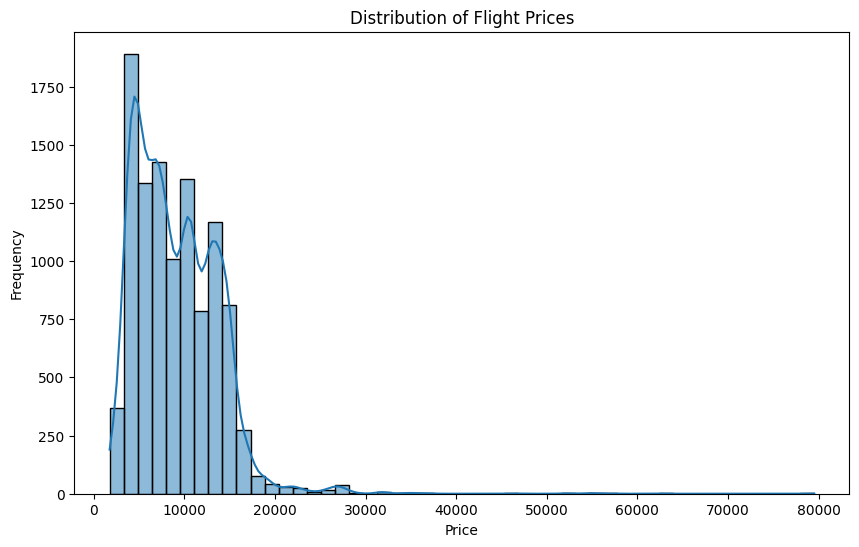

In [7]:
# Distribution of flight prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

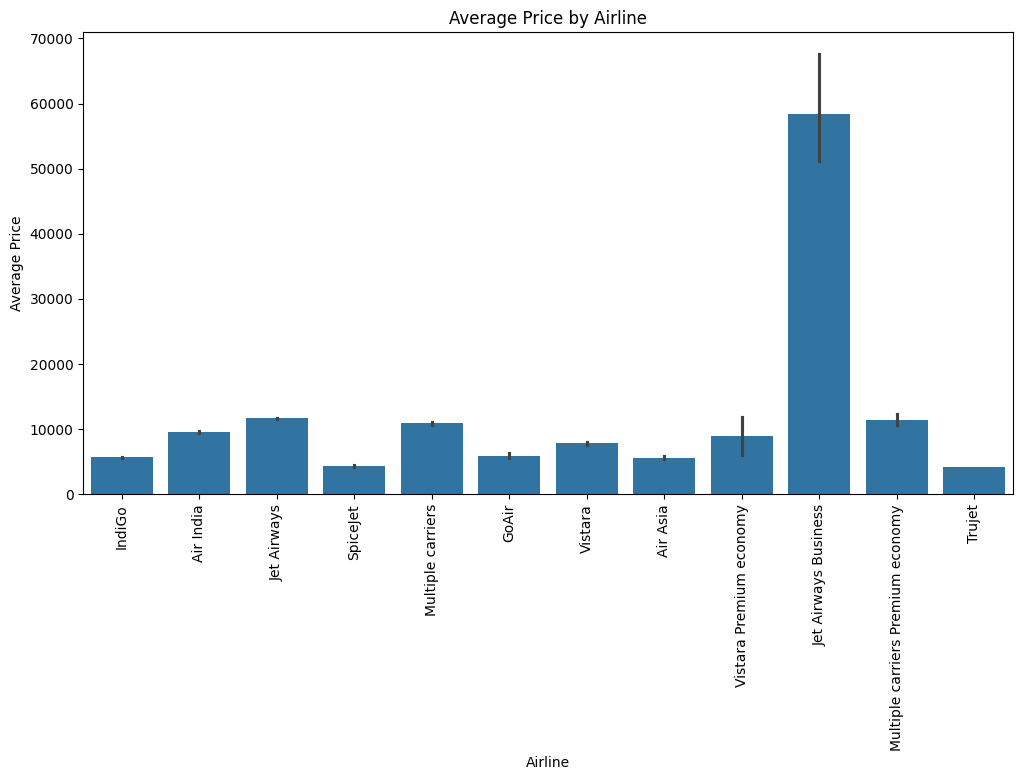

In [8]:
# Average price by airline
plt.figure(figsize=(12, 6))
sns.barplot(x='Airline', y='Price', data=df, estimator=np.mean)
plt.title('Average Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

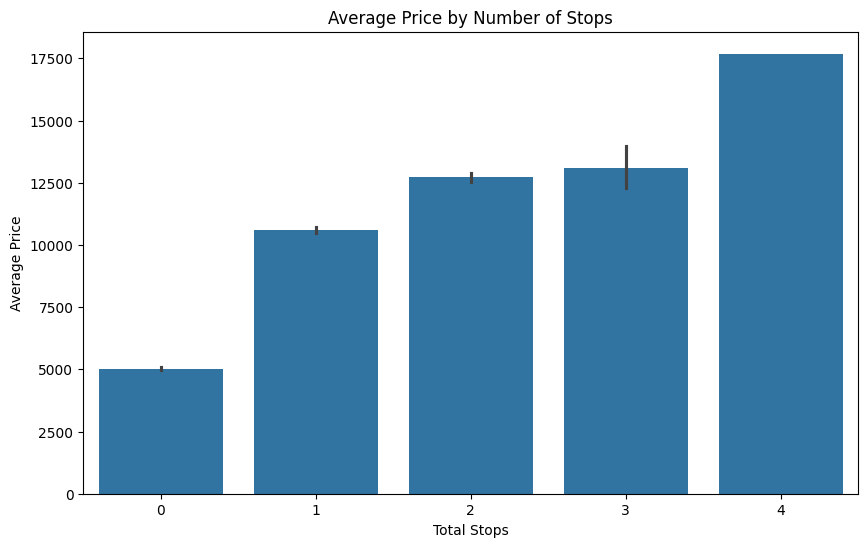

In [9]:
# Average price by number of stops
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Stops', y='Price', data=df, estimator=np.mean)
plt.title('Average Price by Number of Stops')
plt.xlabel('Total Stops')
plt.ylabel('Average Price')
plt.show()

## Correlation Heatmap

Let's look at the correlation between the numeric features.

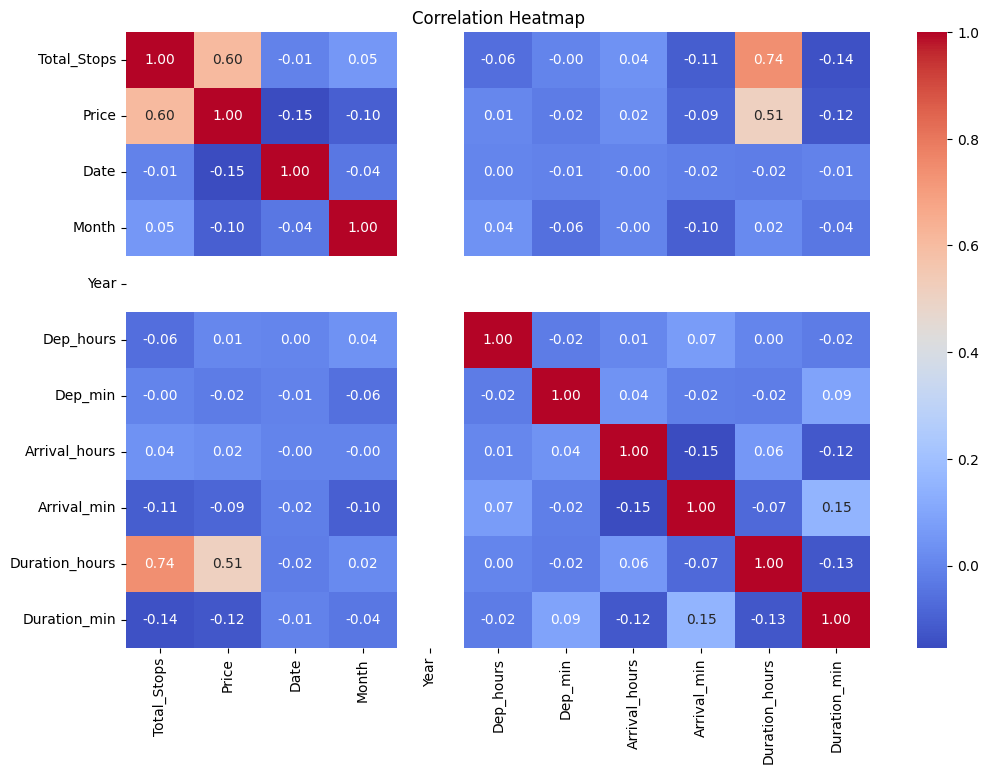

In [10]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Predictive Modeling

Based on the data, it seems useful to predict the flight price. Let's create a simple linear regression model to predict the price.

In [11]:
# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data for modeling
X = numeric_df.drop(columns=['Price'])
y = numeric_df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 12583522.962790493
R-squared: 0.40542699181785535


## TEST CASE

In [15]:
input_data = (1, 6, 5, 2020, 18, 55, 8, 15, 3, 20)

# Changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting on 1 instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Predicting the flight ticket price
prediction = model.predict(input_data_reshaped)

print('The predicted flight ticket price: ', prediction[0])

The predicted flight ticket price:  9850.902019664156


In [18]:
import pickle
filename = "flight_price_prediction_model.sav"
pickle.dump(model, open(filename, 'wb'))

loaded_model = pickle.load(open('flight_price_prediction_model.sav','rb'))

In [19]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00


In [25]:
%%writefile flight_price_app.py
import numpy as np
import pickle
import pandas as pd
import streamlit as st
from PIL import Image
import io

# Loading the saved model
try:
    loaded_model = pickle.load(open('flight_price_prediction_model.sav', 'rb'))
except Exception as e:
    st.error(f"Error loading model: {e}")

# Creating a function for prediction
def flight_price_prediction(input_data):
    try:
        # Changing the input data to numpy array
        input_data_as_numpy_array = np.asarray(input_data)

        # Reshape the array as we are predicting on one instance
        input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

        # Predicting the flight ticket price
        prediction = loaded_model.predict(input_data_reshaped)
        return prediction[0]
    except Exception as e:
        st.error(f"Error during prediction: {e}")
        return None

def load_image(image_path):
    try:
        with open(image_path, "rb") as file:
            image_data = file.read()
            if not image_data:
                st.error(f"Image file {image_path} is empty.")
                return None
            return Image.open(io.BytesIO(image_data))
    except Exception as e:
        st.error(f"Error loading image {image_path}: {e}")
        return None

def main():
    st.write("Writing flight_price_app.py")

    # Loading and displaying the background image
    bg_image = load_image('bg.png')
    if bg_image:
        st.image(bg_image)

    # Giving a title
    st.title('Flight Ticket Price Prediction')

    # Getting input data from user
    Total_Stops = st.number_input("Total Stops")
    Date = st.number_input("Date")
    Month = st.number_input("Month")
    Year = st.number_input("Year")
    Dep_hours = st.number_input("Departure Hours")
    Dep_min = st.number_input("Departure Minutes")
    Arrival_hours = st.number_input("Arrival Hours")
    Arrival_min = st.number_input("Arrival Minutes")
    Duration_hours = st.number_input("Duration Hours")
    Duration_min = st.number_input("Duration Minutes")

    # Code for prediction
    price = ''

    # Creating a button for Prediction
    if st.button('Predict Flight Price'):
        price = flight_price_prediction([Total_Stops, Date, Month, Year, Dep_hours, Dep_min, Arrival_hours, Arrival_min, Duration_hours, Duration_min])
        if price is not None:
            st.success(f'The Predicted Flight Ticket Price: {price}$')

    # Displaying images
    st.subheader('Model Statistics:')
    for img_path, caption in [('actual_vs_predicted1.png', 'Actual Vs Predicted Values 1'), ('actual_vs_predicted2.png', 'Actual Vs Predicted Values 2')]:
        img = load_image(img_path)
        if img:
            st.image(img, caption=caption)

if __name__ == '__main__':
    main()


Writing flight_price_app.py


In [26]:
!streamlit run flight_price_app.py &>/dev/null&